<a href="https://colab.research.google.com/github/JUNGGUKLEE/jklee/blob/main/Getting_Started_with_Neural_Networks_CH3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Anatomy of a Neural Network

#Layers, which are combined into a network (or model)
#The input data and corresponding targets
#The loss function, which defines the feedback signal used for learning
#The optimizer, which determines how learning proceeds

In [ ]:
#Layers : the building blocks of deep learning -> 하나의 함수가 적용되는 층?
#Layer 형태 : Dense layers, CNN layers, LSTM layers

In [ ]:
#Layers는 인풋 사이즈와 아웃풋 사이즈가 중요

from keras import layers
layer = layers.Dense(32,input_shape=(784,))

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, input_shape(784,)))
model.add(layers.Dense(32))

NameError: ignored

In [ ]:
#Models : Networks of Layers
# a deep learning model is a directed, acyclic graph of layers.
# Two - branch networks, Multihead networks, Inception blocks
# Choosing a network topology -> hypothesis space를 정의? 하는것

In [ ]:
#Loss function and optimizers:keys to configuring the learning process
#Loss function ( objective function ) : The quantity that will be minimized during trainning.


In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [ ]:
print(train_data)
#각 단어별로 숫자를 부여해서 하나의 sequential로 구성

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])
decoded_review = ''.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]])


In [ ]:
import tensorflow
tensorflow.keras.__version__

'2.5.0'

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [ ]:
train_data[0]

In [ ]:
train_labels[0]

In [ ]:
max([max(sequence) for sequence in train_data])

In [ ]:
word_index

In [ ]:
reverse_word_index=dict([(value, key) for (key,value) in word_index.items()])

In [ ]:
word_index = imdb.get_word_index()

In [ ]:
reverse_word_index

In [ ]:
decoded_review = '  '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [ ]:
decoded_review

In [ ]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  #공간을 잡아두는것, 이럴 경우 속도가 훨씬 빨라짐
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
#sequence 가 있는 위치에 1 표시를 하는 것
#review 개수가 행, 컬럼갯수는 1만개 -> 해당 단어가 있으면 1 없으면 0 이런식임.

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_test[:20]

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
history_dict = history.history
history_dict.keys()
#가끔 이름이 바뀌는 경우가 있다. 

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss_1 = history.history['loss']
val_loss_1= history.history['val_loss']

epochs = range(1,len(acc) +1 )

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1,'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#과적합을 방지하는 방법 중 하나가 early stop

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

In [ ]:
results

In [ ]:
model.predict(x_test)

In [ ]:
#Multiclass classification example

In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data,test_labels) = reuters.load_data(num_words=10000)

/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in
                             train_data[0]])

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np

def vectorize_sequence(sequence, dimension = 10000):
  results = np.zeros((len(sequence), dimension))
  for i, sequence in enumerate(sequence):
    results[i, sequence] = 1.
  return results

In [ ]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [ ]:
x_train[:5]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape =(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
#sigmoid는 0과 1을 구분하는것
#softmax는?

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partail_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partail_y_train,
                    epochs = 20,
                    batch_size= 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 16s 85ms/step - loss: 3.1203 - accuracy: 0.4248 - val_loss: 1.7556 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 1s 51ms/step - loss: 1.5309 - accuracy: 0.6906 - val_loss: 1.3174 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 1.1237 - accuracy: 0.7577 - val_loss: 1.1410 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 0.8686 - accuracy: 0.8193 - val_loss: 1.0496 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 1s 50ms/step - loss: 0.6663 - accuracy: 0.8587 - val_loss: 0.9805 - val_accuracy: 0.8040
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5388 - accuracy: 0.8899 - val_loss: 0.9560 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.4234 - accuracy: 0.9168 - val_loss: 0.9248 - val_accuracy: 0.8110
Epoch 8/20
1

In [ ]:
predictions = model.predict(x_test)

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

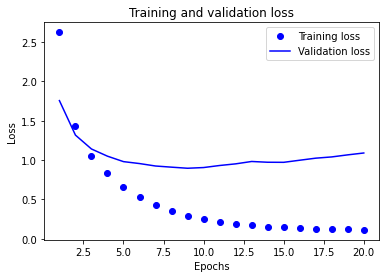

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
#Predicting house prices : a regression example

In [ ]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data -= std

test_data -= mean
test_data -= std

In [ ]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

  #모델을 여러번 사용해야 할때는 bulid_model() 함수를 사용

In [ ]:
import numpy as np

k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [ ]:
from tensorflow.keras import backend as K

K.clear_session()

In [ ]:
num_epochs = 500
all_mae_histories=[]


for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis=0)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),
                      epochs=num_epochs, batch_size=100,verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
average_mae_history=[
                     np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [ ]:
all_scores

[2.7072670459747314, 3.5409207344055176, 4.648921012878418, 3.438626527786255]

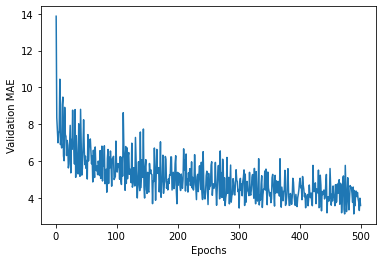

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()